# An analysis of competition points

Everybody wants to be top on Kaggle ! Well, if you have managed to be an expert in some category (competitions, kernels, datasets of discussion), you may have taken a look here :

https://www.kaggle.com/progression

As many of you may have noticed, our competition points decrease over time (like all other points in any ranking category). However, they are also a function of a multitude of parameters depending on the competition, your team, and your performance. I have found this formula :

<img src="compet_points.png" width=1000 height=200 />

Note that you can find more details about the formula here : https://medium.com/kaggle-blog

I decided to do this little notebook so you can have an actual idea of what has an impact on the final points you get.

## Univariate Analysis

### Build our points function

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
N_team_mate = 4
rank = 100
N_teams = 2000

In [63]:
def points(rank=rank, t=0, N_team_mate=N_team_mate, N_teams=N_teams, verbose=0):
#     assert (N_team_mate>0) & (N_teams>0) & (rank>0)
    coeffs = [100000/np.sqrt(N_team_mate)]
    coeffs.append(rank**(-0.75))
    coeffs.append(np.log10(1+np.log10(N_teams)))
    coeffs.append(np.exp(-t/500))
    res = np.prod(coeffs)
#     res= int(round(res))
    if verbose:
        print(f'In a competition of {N_teams} teams where your team of {N_team_mate} people is ranked {rank}, your points at day {t} are {int(round(res))}')
    return res
points(verbose=1)

In a competition of 2000 teams where your team of 4 people is ranked 100, your points at day 0 are 1002


1001.7660361440045

### Ranking

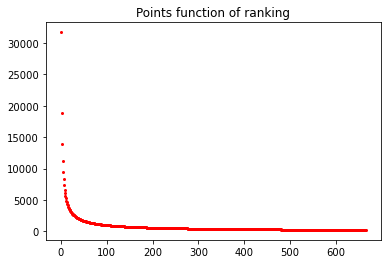

In [24]:
R = np.arange(1, N_teams//3)
P = [points(rank=r, verbose=0) for r in R]
plt.plot(figsize=(8,8))
plt.plot(R, P, 'ro', markersize=2)
plt.title('Points function of ranking')
plt.show()

Ranking has a huge impact on your score if you're fighting to win 1 or 2 places when you're in the top 50, not that much if you're lower.

### Number of competitive teams

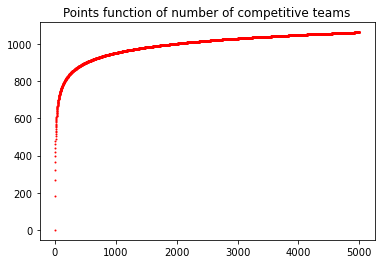

In [20]:
N = np.arange(1,5000)
P = [points(N_teams=n, verbose=0) for n in N]
plt.plot(figsize=(8,8))
plt.plot(N, P, 'ro', markersize=1)
plt.title('Points function of number of competitive teams')
plt.show()

Don't count to much on the increasing number of teams to win points if there are already a thousand or more of them.

### Size of team

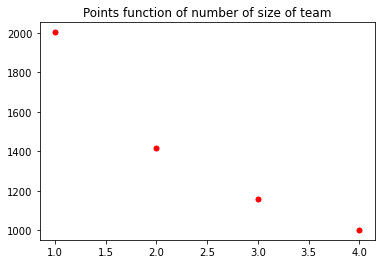

In [21]:
N = np.arange(1,5)
P = [points(N_team_mate=n, verbose=0) for n in N]
plt.plot(figsize=(8,8))
plt.plot(N, P, 'ro', markersize=5)
plt.title('Points function of size of team')
plt.show()

Wow, this actually is a very important factor ! From the formula, you could already have noticed that from being alone in a team and being in a team of 4 your score is divided by $2=\sqrt4$, but it is even more visible here...

### Time elapsed

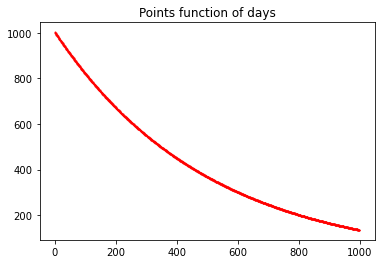

In [23]:
T = np.arange(0,1000)
P = [points(t=t, verbose=0) for t in T]
plt.plot(figsize=(8,8))
plt.plot(T, P, 'ro', markersize=1)
plt.title('Points function of days')
plt.show()

The points decay in time to keep the rankings up to date (but don't worry, you keep your medals). Here you can see that every year (365 days) you lose around the half of your points : 

In [64]:
np.exp(-365/500)

0.48190899009020244

## The importance of team size

I want to highlight this very important factor that people tend to forget.

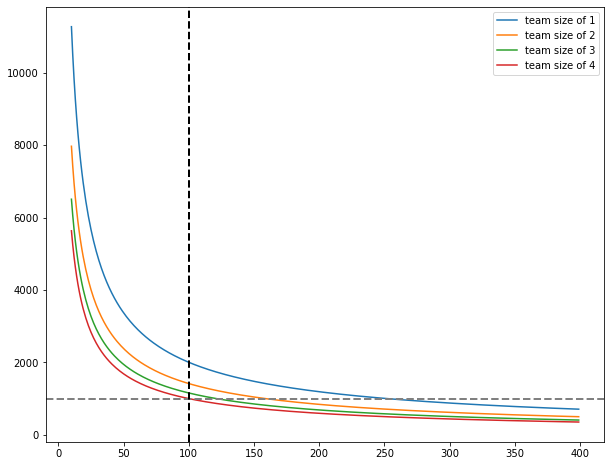

In [58]:
N1 = np.arange(1,5)
N=2000
R = np.arange(10,400)
fig = plt.figure(figsize=(10,8))
list_of_P = {}
for n in N1:
    P = points(rank=R, N_team_mate=n, N_teams=N)
    list_of_P[n] = P
    plt.plot(R, P, label=f'team size of {n}')
plt.axhline(y=1000, linewidth=2, c='grey', ls='--')
plt.axvline(x=100, linewidth=2, c='black', ls='--')
plt.legend()
plt.show()

In [60]:
for n, P in list_of_P.items():
    print(f'For team size {n}, you get 1000 points at rank {np.argmin([abs(p-1000) for p in P])}')
    print(f'For team size {n}, at rank 100 you get {int(round(points(rank=100, N_team_mate=n, N_teams=N)))} points')
    print('-'*100)

For team size 1, you get 1000 points at rank 243
For team size 1, at rank 100 you get 2004 points
----------------------------------------------------------------------------------------------------
For team size 2, you get 1000 points at rank 149
For team size 2, at rank 100 you get 1417 points
----------------------------------------------------------------------------------------------------
For team size 3, you get 1000 points at rank 111
For team size 3, at rank 100 you get 1157 points
----------------------------------------------------------------------------------------------------
For team size 4, you get 1000 points at rank 90
For team size 4, at rank 100 you get 1002 points
----------------------------------------------------------------------------------------------------


So in conclusion, don't try to have the biggest team possible...